In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/robin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/robin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


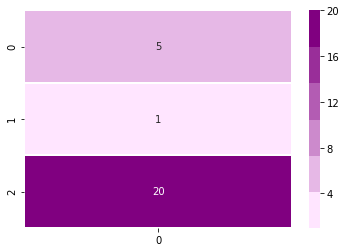

In [8]:
dec_hidden_state = [5,1,20]


sns.heatmap(np.matrix(dec_hidden_state).T,annot=True,cmap=sns.light_palette("purple"),linewidths=1)


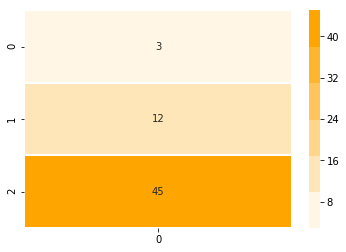

In [10]:
annotation = [3,12,45]

sns.heatmap(np.matrix(annotation).T,annot=True,cmap=sns.light_palette("orange"),linewidths=1)


In [12]:
def single_dot_annotion_score(dec_hidden_state,enc_hidden_state):
    return np.dot(dec_hidden_state,enc_hidden_state)
print(single_dot_annotion_score(dec_hidden_state,annotation))

927


In [15]:
annotations =np.transpose([[3,12,45],[59,2,5],[1,43,5],[4,3,45.3]])

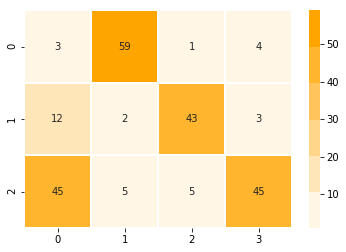

In [18]:
sns.heatmap(annotations,annot=True,cmap=sns.light_palette("orange"),linewidths=1)

In [20]:
def dot_attention_score(dec_hidden_state,annotations):
    return np.matmul(np.transpose(dec_hidden_state),annotations)
attention_weights_raw = dot_attention_score(dec_hidden_state, annotations)

In [22]:
attention_weights_raw

[ 927.  397.  148.  929.]


In [26]:
def softmax(x):
    x = np.array(x,dtype = np.float128)
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=0) 

In [28]:
attention_weights = softmax(attention_weights_raw)
attention_weights

array([ 0.11920292,  7.9471515e-232,  5.7661442e-340,  0.88079708], dtype=float128)

In [29]:
def apply_attention_scores(attention_weights, annotations):
    return attention_weights * annotations
applied_attention = apply_attention_scores(attention_weights, annotations)
applied_attention

array([[ 0.35760877,  4.6888194e-230,  5.7661442e-340,  3.5231883],
       [ 1.4304351,  1.5894303e-231,  2.479442e-338,  2.6423912],
       [ 5.3641315,  3.9735758e-231,  2.8830721e-339,  39.900108]], dtype=float128)

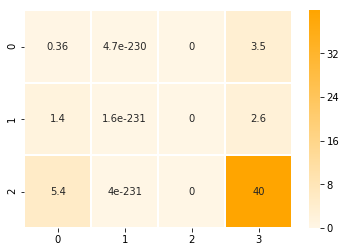

In [30]:
ax = sns.heatmap(applied_attention, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

In [31]:
def calculate_attention_vector(applied_attention):
    return np.sum(applied_attention, axis=1)
attention_vector = calculate_attention_vector(applied_attention)
attention_vector


array([ 3.8807971,  4.0728263,  45.264239], dtype=float128)

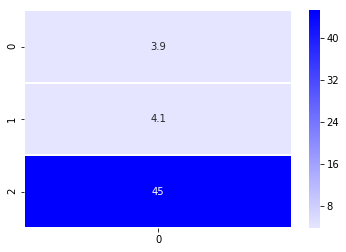

In [32]:
sns.heatmap(np.transpose(np.matrix(attention_vector)), annot=True, cmap=sns.light_palette("Blue", as_cmap=True), linewidths=1)